# Credit Card Fraud Detection

## Dependency

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import time
import collections

pd.set_option('display.max_columns', None)
pd.set_option('expand_frame_repr', False)
plt.style.use('default')

## Parameter

In [44]:
CSV_01 = '../data/creditcard.csv'
RANDOM_STATE = 0

## Data

In [4]:
df = pd.read_csv(CSV_01)

In [24]:
print(df.shape)

(284807, 31)


In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [15]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [23]:
num_class_0 = df['Class'].value_counts()[0]
num_class_1 = df['Class'].value_counts()[1]

print(f'Fraud: {num_class_1 / len(df):.2%}, count: {num_class_1:,}')
print(f'Non-fraud: {num_class_0 / len(df):.2%}, count: {num_class_0:,}')

Fraud: 0.17%, count: 492
Non-fraud: 99.83%, count: 284,315


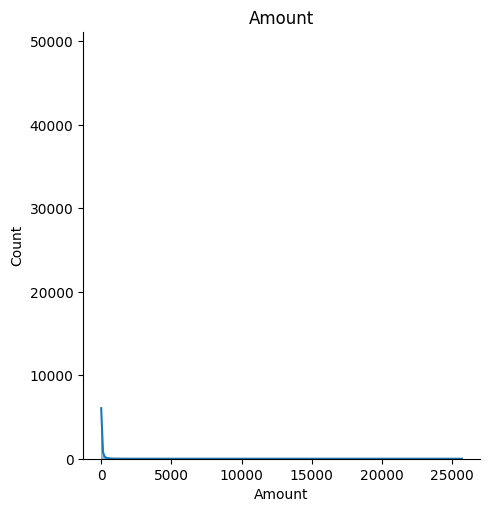

In [31]:
sns.displot(df['Amount'], kde=True)
plt.title('Amount')
plt.show()

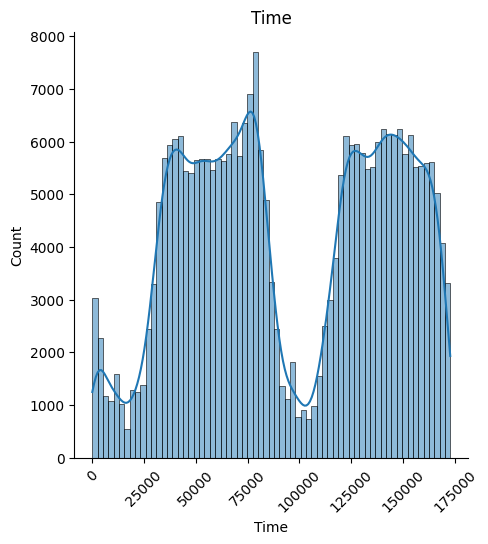

In [32]:
sns.displot(df['Time'], kde=True)
plt.title('Time')
plt.xticks(rotation=45)
plt.show()

## Preprocess data

In [37]:
# std_scaler = StandardScaler()
# RobustScaler is less prone to outliers
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df[['Amount']])
df['scaled_time'] = rob_scaler.fit_transform(df[['Time']])
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [38]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


## Split data

## Make balanced data

In [45]:
df = shuffle(df, random_state=RANDOM_STATE)

df_fraud = df.loc[df['Class'] == 1]
df_non_fraud = df.loc[df['Class'] == 0][:len(df_fraud)]

df_balanced = pd.concat([df_fraud, df_non_fraud])
df_balanced = shuffle(df_balanced, random_state=RANDOM_STATE)

In [50]:
print(df_balanced.shape)

(984, 31)


In [46]:
df_balanced.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
243393,-5.488032,3.329561,-5.996296,3.601720,-2.023926,-1.737393,-4.396859,0.228394,-1.675884,-3.991785,3.737038,-6.150187,0.288738,-8.760695,2.344651,-5.145638,-6.293479,-2.137187,2.995245,-0.551121,1.719631,0.343209,0.133584,0.833340,-0.839776,0.502010,-1.937473,1.521218,1,-0.307273,0.789765
43338,1.190011,0.257177,0.396116,0.633946,-0.463676,-0.875466,-0.041186,-0.041364,-0.162898,-0.100925,1.725691,0.714278,-0.413649,0.025799,0.436261,0.640671,-0.152287,0.194614,0.016596,-0.100432,-0.225800,-0.724994,0.144313,0.481425,0.139616,0.065614,-0.030874,0.022372,0,-0.219660,-0.507818
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1,5.142178,0.992140
117738,1.110486,-0.552512,1.953964,0.785171,-1.779837,-0.035053,-1.065103,0.176009,1.697410,-0.604191,-0.659075,1.532117,0.864171,-1.371924,-1.644085,-0.644784,0.610730,-0.843180,0.391456,-0.041837,-0.068969,0.347392,0.015222,1.066738,0.231558,1.092961,0.014094,0.025874,0,-0.159296,-0.116320
99504,1.358043,-1.099869,0.297847,-1.273929,-1.466247,-1.027835,-0.629799,-0.352559,-2.089235,1.366691,-0.265422,-0.300941,1.515792,-0.430994,0.414693,-0.469043,0.480052,-0.332587,-0.181459,-0.089777,-0.287556,-0.606988,0.022670,0.380512,0.309240,-0.351789,0.015222,0.038787,0,1.088521,-0.206100


In [47]:
df_balanced.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
3946,1.235832,0.541397,-0.115374,1.045618,0.329727,-0.695938,0.554301,-0.284570,-0.462702,-0.033306,0.062828,0.934512,1.166662,0.355223,0.803216,-0.565502,-0.102119,-0.965558,-0.619359,-0.111904,0.043921,0.278872,-0.129468,0.127628,0.820296,-0.270671,0.016448,0.010002,0,-0.293440,-0.953113
15225,-19.856322,12.095893,-22.464083,6.115541,-15.148022,-4.346724,-15.648507,13.276805,-3.974162,-8.859194,5.730816,-8.088034,0.230825,-8.578973,0.000947,-6.947746,-13.472897,-4.940211,1.230143,1.582930,1.750730,-1.409636,-0.809809,0.121397,1.350300,-0.224292,1.597621,0.476920,1,1.089779,-0.682656
132198,1.034378,-0.070457,0.536127,1.234784,-0.179199,0.481662,-0.185985,0.234971,0.215617,-0.005038,0.867024,1.057030,-0.300023,0.188294,-0.592855,-0.212196,-0.168462,-0.368511,0.037072,-0.079813,-0.186159,-0.481456,-0.018817,-0.322029,0.406694,-0.501218,0.040506,0.019257,0,0.460980,-0.056356
55931,-1.856552,0.833027,0.510424,-0.169264,0.224596,-1.002514,-0.122139,0.789186,-0.825583,-1.320084,-0.270581,0.825998,1.019124,0.089885,0.539726,0.563735,0.297246,-0.670741,-1.147849,-0.219032,-0.007188,-0.504637,-0.049163,0.061231,-0.501612,-0.103565,-0.238053,-0.112733,0,-0.269825,-0.440548
137003,-2.449928,-1.742119,1.408331,-2.067479,-1.572102,-0.139554,0.394806,0.806371,1.102388,-2.331140,0.885258,0.054583,-2.543674,0.744167,0.485300,-0.043707,0.042736,0.766769,-0.226325,0.715144,0.576000,0.565788,0.590588,0.192965,0.473348,-0.008480,-0.188403,-0.130178,0,5.114232,-0.031920


In [49]:
df_balanced['Class'].value_counts() / len(df_balanced)

1    0.5
0    0.5
Name: Class, dtype: float64

## Reference
- [Credit Fraud || Dealing with Imbalanced Datasets](https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets)